In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Dataset

In [2]:
x, y = make_regression(n_samples = 100, n_features = 2, noise = 10)

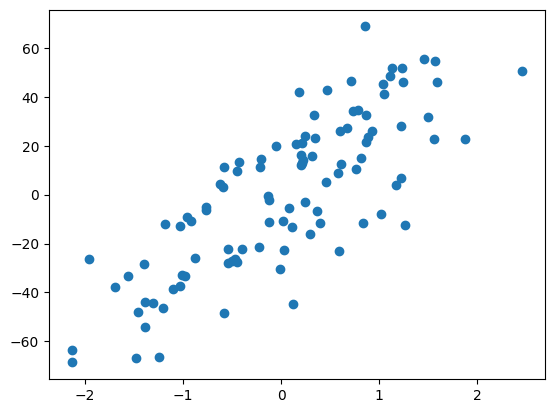

In [5]:
plt.scatter(x[:,0],y)
plt.show()

In [6]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100, 1)


In [7]:
X = np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)

(100, 3)


In [8]:
theta = np.random.rand(3,1)

# Modèle

In [9]:
def model(X,theta):
    return X.dot(theta)

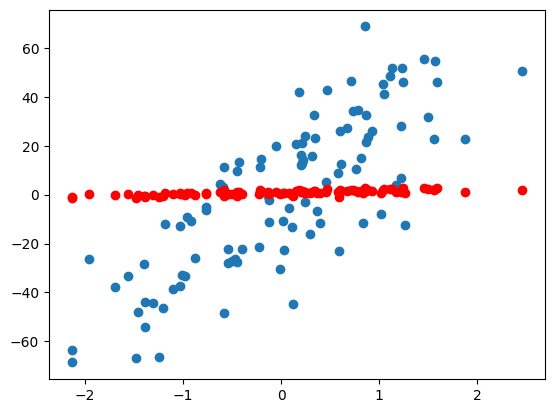

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],model(X,theta), c='r')
plt.show()

# Fonction coût

In [11]:
def cost_function(X,y,theta):
    m = len(y)
    return 1 / (2*m) * np.sum((model(X,theta)-y)**2)

In [12]:
cost_function(X,y,theta)

478.4430341837097

# Gradients et descente de gradient

In [13]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [14]:
def gradient_descent(X,y,theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

# Machine learning

In [15]:
theta_final, cost_history = gradient_descent(X,y,theta, 0.01 ,1000)

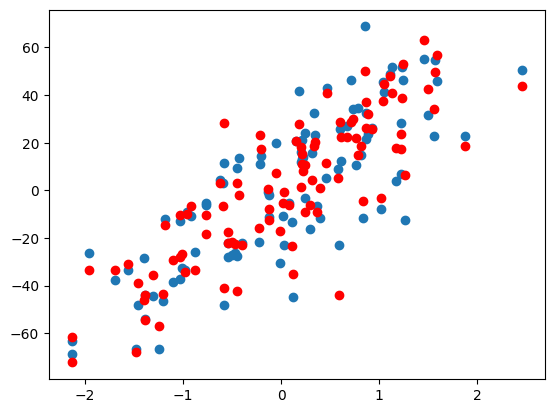

In [17]:
predictions = model(X,theta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions, c='r')
plt.show()

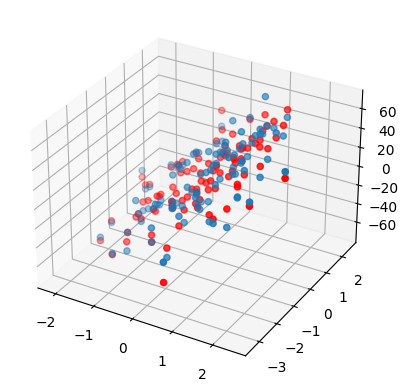

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0],x[:,1],y)
ax.scatter(x[:,0],x[:,1],predictions, c='r')

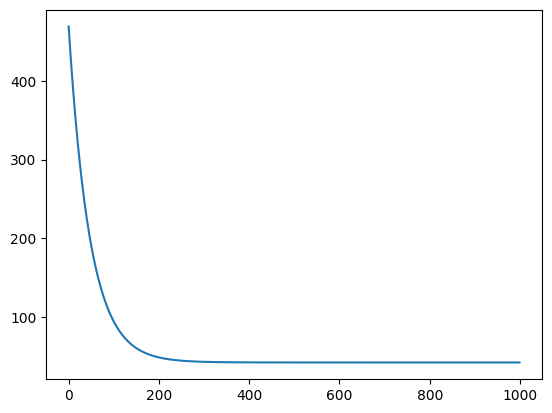

In [18]:
plt.plot(range(1000), cost_history)
plt.show()

In [19]:
def coeff_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

In [20]:
coeff_determination(y, predictions)

0.9169019566030169